## Входные данные
У вас есть две таблицы: Customer_info.xlsx (информация о клиентах) и Transactions_info.xlsx (транзакции за период с 01.06.2015 по 01.06.2016).

## Легенда
Вы работаете аналитиком в онлайн-платформе по продаже подписок на цифровые сервисы (музыка, фильмы, софт, облачное хранение и т. д.). Бизнес заинтересован в анализе клиентской базы и транзакций, чтобы определить наиболее ценных клиентов, их поведенческие паттерны и ключевые сегменты.

## Анализ структуры данных
Таблица Transactions_info.xlsx содержит date_new (дата покупки), Id_check (ID заказа), ID_client (ID клиента), Count_products (количество купленных товаров), Sum_payment (сумма платежа).
Таблица Customer_info.xlsx содержит Id_client (ID клиента), Total_amount (общая сумма покупок), Gender (пол: M/F/NA), Age (возраст), Count_city (количество городов, где клиент делал покупки), Response_communcation (реакция на коммуникации), Communication_3month (контактировали ли с клиентом за 3 месяца), Tenure (стаж клиента в месяцах).

## Задания
1.	Определение ключевых клиентов. Ключевые клиенты — те, кто оформлял подписку 3 и более месяцев подряд. Определите таких клиентов, посчитайте их количество, рассчитайте их долю в общей выручке и охарактеризуйте этот сегмент (возраст, пол, другие характеристики).
2.	Помесячный анализ. Рассчитайте среднюю сумму платежа, среднее количество транзакций, среднее количество активных клиентов, долю операций в каждом месяце от общего количества за год, долю месячной выручки от общей суммы, половой состав (M/F/NA) с их долей в каждом месяце. Сделайте краткие выводы с акцентом на интересные моменты.
3.	Анализ возрастных групп. Разбейте клиентов по возрастным группам с шагом 10 лет, отдельно выделите клиентов без данных о возрасте. Для каждой группы и неизвестного возраста рассчитайте сумму платежей за весь период, количество транзакций, средние показатели по кварталам и долю каждой группы.

## Формат результата

Презентационный отчет с читаемыми графиками и аналитическими представлениями. Отдельный файл (идеально гит) с кодом и графиками для технического разбора результатов. Выводы должны исходить из информации в визуализации или фактах, а визуализация — легко интерпретируемой для любого уровня читателя.

In [105]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [6]:
customers = pd.read_excel('customer_info.xlsx')
customers.head(3)

,Id_client,Total_amount,Gender,Age,Count_city,Response_communcation,Communication_3month,Tenure
0,16052,1636.81,F,65.0,1,1,1,5
1,25027,4539.09,M,29.0,1,1,1,10
2,25659,6342.11,F,44.0,1,0,1,10


In [9]:
customers.shape

(2429, 8)

In [71]:
customers.dtypes

Id_client                  int64
Total_amount             float64
Gender                    object
Age                      float64
Count_city                 int64
Response_communcation      int64
Communication_3month       int64
Tenure                     int64
dtype: object

In [144]:
customers.isna().sum()

Id_client                 0
Total_amount              0
Gender                   64
Age                      35
Count_city                0
Response_communcation     0
Communication_3month      0
Tenure                    0
dtype: int64

In [93]:
transactions = pd.read_excel('transactions_info.xlsx')
transactions.head(3)

,date_new,Id_check,ID_client,Count_products,Sum_payment
0,2016-03-01,2271145,104027,2.034,23.31
1,2016-03-01,2271145,104027,1.000,31.75
2,2016-03-01,2271145,104027,1.000,6.80


In [94]:
transactions.shape

(419122, 5)

In [95]:
transactions.dtypes

date_new          datetime64[ns]
Id_check                   int64
ID_client                  int64
Count_products           float64
Sum_payment              float64
dtype: object

In [96]:
transactions.date_new.min(), transactions.date_new.max()

(Timestamp('2015-06-01 00:00:00'), Timestamp('2016-06-01 00:00:00'))

In [143]:
transactions.isna().sum()

date_new          0
Id_check          0
ID_client         0
Count_products    0
Sum_payment       0
month             0
year              0
dtype: int64

### **1. Определение ключевых клиентов. Ключевые клиенты — те, кто оформлял подписку 3 и более месяцев подряд. Определите таких клиентов, посчитайте их количество, рассчитайте их долю в общей выручке и охарактеризуйте этот сегмент (возраст, пол, другие характеристики)**

In [108]:
# выделяю отдельные колонки с годом и месяцем
transactions['month'] = transactions['date_new'].dt.month
transactions['year'] = transactions['date_new'].dt.year
transactions.head(3)

,date_new,Id_check,ID_client,Count_products,Sum_payment,month,year
0,2016-03-01,2271145,104027,2.034,23.31,3,2016
1,2016-03-01,2271145,104027,1.000,31.75,3,2016
2,2016-03-01,2271145,104027,1.000,6.80,3,2016


In [109]:
# делаю группировку по клиент - год - месяц
# всего 12721 уников
key_clients = transactions.groupby(['ID_client', 'year', 'month']).size().reset_index(name='sub_counts')
key_clients

,ID_client,year,month,sub_counts
0,16052,2015,6,548
1,16052,2015,7,5307
2,16052,2015,8,6450
3,16052,2015,9,4673
4,16052,2015,10,4194
...,...,...,...,...
12716,410975,2016,6,9
12717,410992,2016,4,8
12718,431325,2016,2,5
12719,431325,2016,3,14


In [110]:
# 1) отбираю клиентов с 3+ месяцами подписки подряд и считаю их кол-во
key_clients = key_clients.groupby('ID_client')['month'].count().reset_index(name='correct_months')
key_clients = key_clients[key_clients['correct_months'] >= 3]['ID_client'].tolist()
print(f"Число ключевых клиентов: {len(key_clients)}")

Число ключевых клиентов: 1591


In [117]:
# доля ключевых клиентов
round(len(key_clients)/12721, 2)

0.13

In [111]:
# 2) считаю долю key_clients в общей выручке
key_clients_money = transactions[transactions['ID_client'].isin(key_clients)]['Sum_payment'].sum()
print(f"Долю клиентов с 3 и более месяцами подписки в общей выручке: {round((key_clients_money / transactions['Sum_payment'].sum()) * 100)}%")

Долю клиентов с 3 и более месяцами подписки в общей выручке: 96%


#### **Вывод: клиенты с 3 и более месяцами подписки приносят большую часть прибыли**

In [112]:
# вывожу инфу о ключевых клиентов в табличке customers
key_customers = customers[customers['Id_client'].isin(key_clients)]
key_customers

,Id_client,Total_amount,Gender,Age,Count_city,Response_communcation,Communication_3month,Tenure
0,16052,1636.81,F,65.0,1,1,1,5
3,33297,9755.31,F,32.0,1,0,1,12
5,43063,2838.66,M,28.0,1,0,1,9
6,56311,2434.96,F,48.0,1,1,1,11
9,112005,1743.74,F,40.0,1,1,1,6
...,...,...,...,...,...,...,...,...
2418,410793,2959.00,F,32.0,1,1,1,6
2423,410920,2524.42,F,26.0,2,1,1,3
2424,410941,4244.38,M,19.0,1,1,1,6
2426,410975,3625.07,F,28.0,1,1,1,7


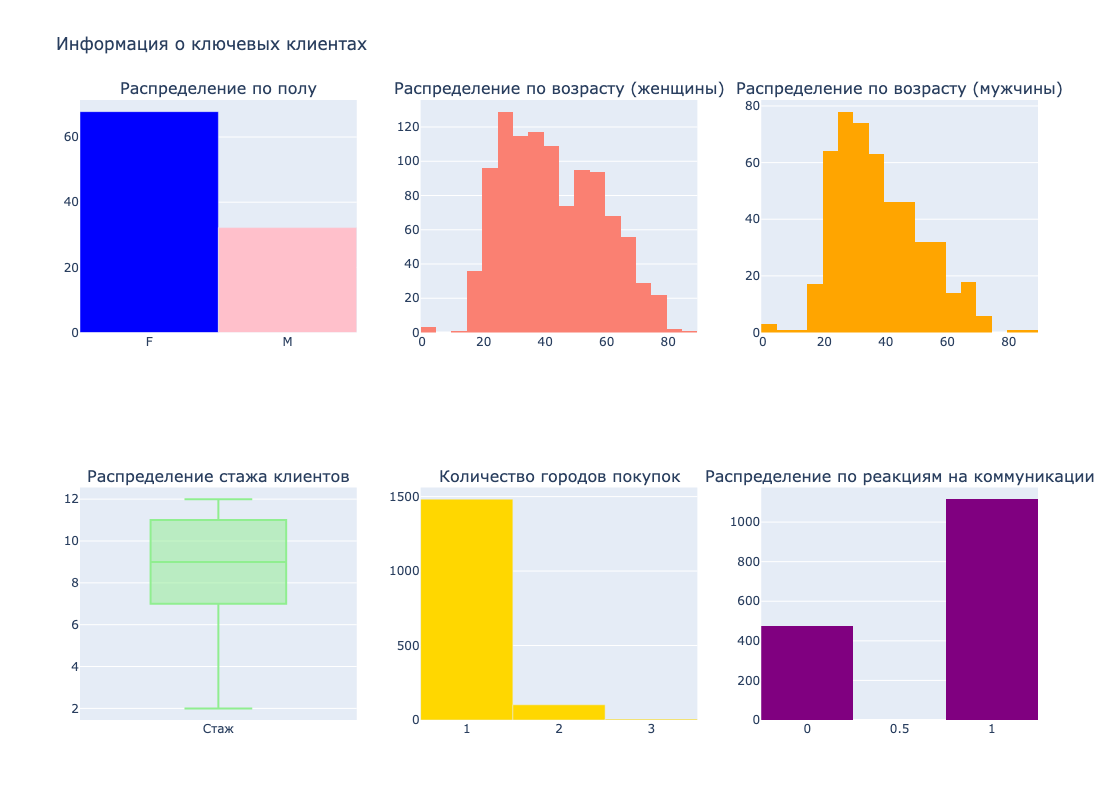

In [139]:
# делаю визуализации с выводом инфы о ключевых клиентах
# использую plotly как любимый инструмент :)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=(
        'Распределение по полу',
        'Распределение по возрасту (женщины)',
        'Распределение по возрасту (мужчины)',
        'Распределение стажа клиентов',
        'Количество городов покупок',
        'Распределение по реакциям на коммуникации'
    )
)

### распределение по полу
gender_dist = key_customers['Gender'].value_counts(normalize=True).mul(100).round(1)
fig.add_trace(
    go.Bar(
        x=gender_dist.index,
        y=gender_dist.values,
        marker_color=['blue', 'pink'],
        name='Пол'
    ),
    row=1, col=1
)

### распределение по возрасту (женщины)
fig.add_trace(
    go.Histogram(
        x=key_customers[key_customers['Gender'] == 'F']['Age'],
        nbinsx=20,
        marker_color='salmon',
        name='Возраст женщин'
    ),
    row=1, col=2
)

### распределение по возрасту (мужчины)
fig.add_trace(
    go.Histogram(
        x=key_customers[key_customers['Gender'] == 'M']['Age'],
        nbinsx=20,
        marker_color='orange',
        name='Возраст мужчин'
    ),
    row=1, col=3
)

### распределение стажа
fig.add_trace(
    go.Box(
        y=key_customers['Tenure'],
        name='Стаж',
        marker_color='lightgreen'
    ),
    row=2, col=1
)

### количество городов
city_counts = key_customers['Count_city'].value_counts().head(5)
fig.add_trace(
    go.Bar(
        x=city_counts.index.astype(str),
        y=city_counts.values,
        marker_color='gold',
        name='Города'
    ),
    row=2, col=2
)

### распределение реакций на коммуникации
fig.add_trace(
    go.Histogram(
        x=key_customers['Response_communcation'],
        nbinsx=3,
        marker_color='purple',
        name='Реакции на коммуникации'
    ),
    row=2, col=3
)

fig.update_layout(
    title_text='Информация о ключевых клиентах',
    height=800,
    showlegend=False
)
fig.show()

### **Общие выводы по ключевым клиентам**

1. Доля клиентов, которые оформляли подписку 3 и более месяцев подряд, является незначительной: так, за период с июня 2015 по июнь 2016 доля ключевых клиентах среди всех, кто осуществлял транзакции, составляет 13%.
2. Несмотря на малочисленность, эти клиенты приносят наибольшую прибыль — 96% выручки поступает от них.
3. Большинство ключевых клиентов женского пола. Преобладающий возраст — от 25 до 29 лет. Однако распределение по возрасту для женщин и для мужчин различается: если у мужчин после 29 тренд убывающий, то для женщин тренд скачкообразный, например, женщины в возрасте 50-54 покупают активнее, чем женщины в возрасте 45-49.
4. Медианный стаж ключевых клиентов составляет 9 месяцев.
5. Преобладающее большинство ключевых клиентов осуществляло покупки в 1 городе.
6. Число ключевых клиентов с положительной реакцией на коммуникации более чем в 2 раза больше, чем число неотреагировавших ключевых клиентов.

### **2. Помесячный анализ. Рассчитайте среднюю сумму платежа, среднее количество транзакций, среднее количество активных клиентов, долю операций в каждом месяце от общего количества за год, долю месячной выручки от общей суммы, половой состав (M/F/NA) с их долей в каждом месяце. Сделайте краткие выводы с акцентом на интересные моменты**

In [196]:
# вывожу всякие статистики
monthly_analysis = transactions.groupby(transactions['date_new']).agg(
    avg_payment=('Sum_payment', 'mean'),
    avg_transactions=('Id_check', 'count'),
    n_active_clients=('ID_client', 'nunique'),
    transaction_share=('Id_check', lambda x: len(x) / len(transactions) * 100),
    revenue_share=('Sum_payment', lambda x: x.sum() / total_revenue * 100)
).reset_index()

In [208]:
# по гендерам
gender_monthly = pd.merge(transactions, customers, left_on='ID_client', right_on='Id_client', how='left')
gender_monthly = gender_monthly.groupby(['date_new', 'Gender']).size().unstack().fillna(0)
gender_monthly = gender_monthly.div(gender_monthly.sum(axis=1), axis=0) * 100

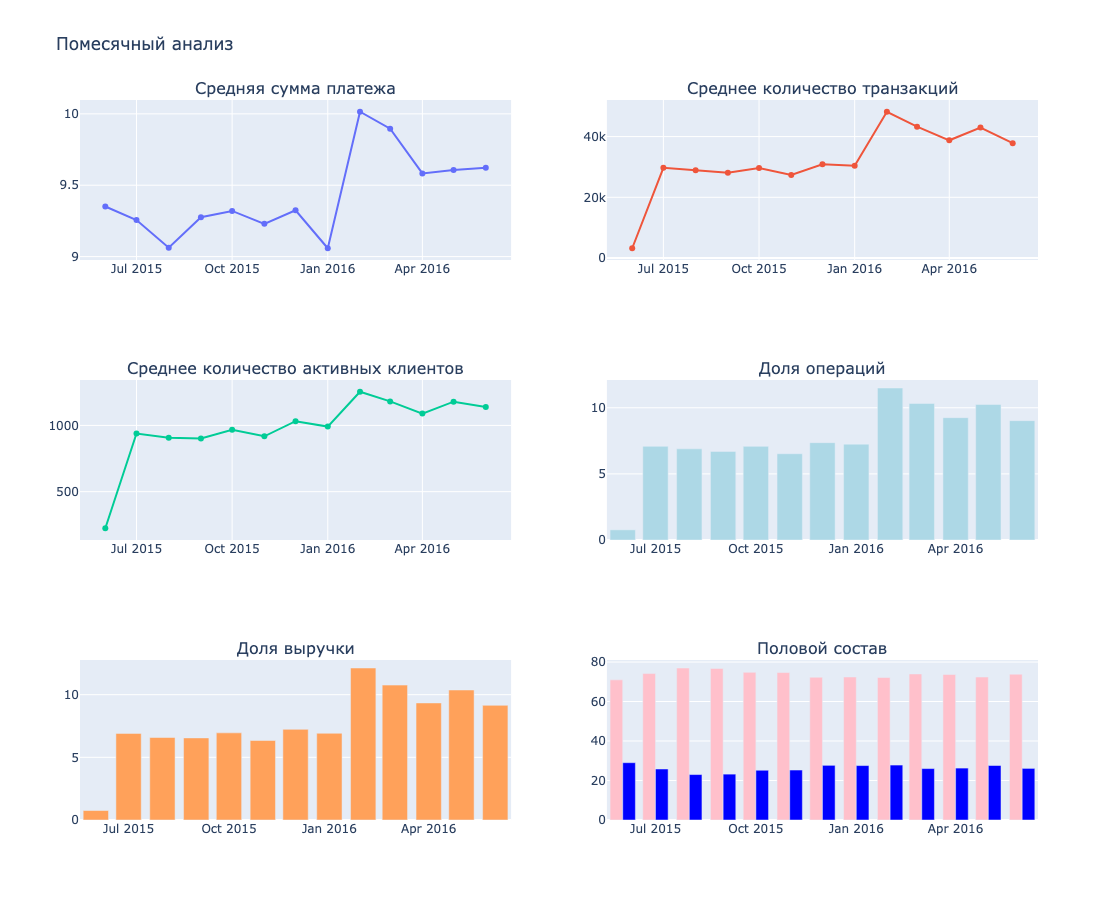

In [209]:
# в идеале скорректировала бы масштаб + отобразила бы все месяца, но не успела(
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Средняя сумма платежа', 
        'Среднее количество транзакций',
        'Среднее количество активных клиентов',
        'Доля операций',
        'Доля выручки', 
        'Половой состав'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_analysis['date_new'],
        y=monthly_analysis['avg_payment'],
    ), 
    row=1, col=1
)


fig.add_trace(
    go.Scatter(
        x=monthly_analysis['date_new'],
        y=monthly_analysis['avg_transactions'],
    ),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(
        x=monthly_analysis['date_new'],
        y=monthly_analysis['n_active_clients'],
    ),
    row=2, col=1
)

fig.add_trace(
    go.Bar(
        x=monthly_analysis['date_new'],
        y=monthly_analysis['transaction_share'],
        marker_color='lightblue'
    ),
    row=2, col=2
)

fig.add_trace(
    go.Bar(
        x=monthly_analysis['date_new'],
        y=monthly_analysis['revenue_share'],
    ),
    row=3, col=1
)

for gender in gender_monthly.columns:
    fig.add_trace(
        go.Bar(
            x=gender_monthly.index.astype(str),
            y=gender_monthly[gender],
            name=gender,
            marker_color={'M': 'blue', 'F': 'pink', 'NA': 'gray'}[gender]
        ),
        row=3, col=2
    )

fig.update_layout(
    height=900, 
    title_text="Помесячный анализ",
    showlegend=False
)
fig.show()

### **Общие выводы в результате помесячного анализа**

1. Наибольшая клиентская активность замечена в феврале 2016 года: в этот месяц зафиксирована максимальные средняя сумма платежа, среднее количество транзакций, среднее число активных клиентов, наибольшая доля операция и наибольшая доля выручки.
2. По графикам можно сказать, что с июня 2015 работа сервиса только начиналась, поскольку и среднее число транзакций, и среднее число активных клиентов были минимальными.
3. Соотношение мужчин и женщин в течение года практически не менялось и оставалось на уровне 70:30 или 75:25. 

### **3. Анализ возрастных групп. Разбейте клиентов по возрастным группам с шагом 10 лет, отдельно выделите клиентов без данных о возрасте. Для каждой группы и неизвестного возраста рассчитайте сумму платежей за весь период, количество транзакций, средние показатели по кварталам и долю каждой группы**

In [217]:
df = pd.merge(transactions, customers, left_on='ID_client', right_on='Id_client')
df['quarter'] = df['date_new'].dt.to_period('Q') # добавила квартал

In [218]:
# создаю возрастные группы
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['age_group'] = df['age_group'].cat.add_categories('Unknown').fillna('Unknown')

age_analysis = df.groupby('age_group').agg({
    'Sum_payment': ['sum', 'count', 'mean'],
    'ID_client': 'nunique'
}).reset_index()

age_analysis.columns = ['age_group', 'total_payment', 'transaction_count', 'avg_payment', 'unique_clients']

In [219]:
age_analysis['payment_share'] = age_analysis['total_payment'] / age_analysis['total_payment'].sum() * 100
age_analysis['transaction_share'] = age_analysis['transaction_count'] / age_analysis['transaction_count'].sum() * 100
quarterly_analysis = df.groupby(['age_group', 'quarter']).agg({
    'Sum_payment': ['sum', 'count']
}).reset_index()
quarterly_analysis.columns = ['age_group', 'quarter', 'quarterly_payment', 'quarterly_transactions']

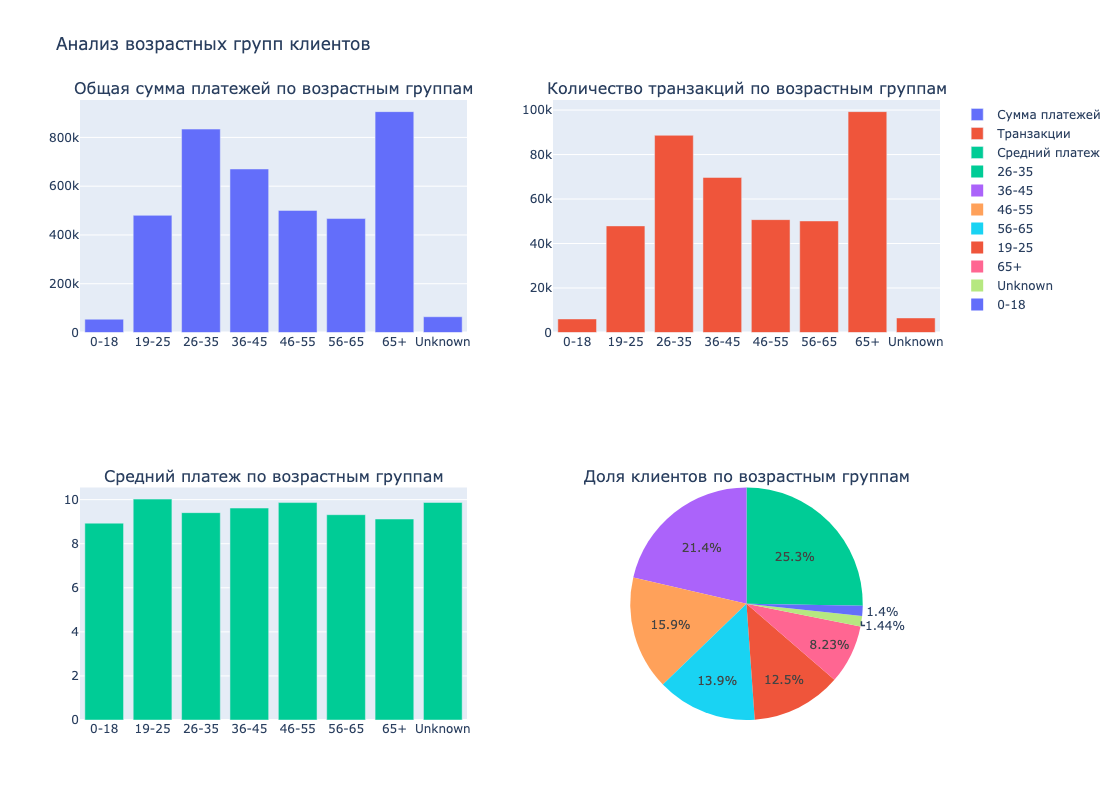

In [241]:
# в идеале скорректирвала бы легенду, оставив только возрастные сегменты
fig = make_subplots(rows=2, cols=2, 
                   subplot_titles=('Общая сумма платежей по возрастным группам',
                                   'Количество транзакций по возрастным группам',
                                   'Средний платеж по возрастным группам',
                                   'Доля клиентов по возрастным группам'),
                   specs=[[{"type": "xy"}, {"type": "xy"}],  # !!! вот эту штуку добавила тк pie не в декартовом сабплоте должен быть
                         [{"type": "xy"}, {"type": "domain"}]]
                   )

fig.add_trace(
    go.Bar(
        x=age_analysis['age_group'],
        y=age_analysis['total_payment'],
        name='Сумма платежей',
        marker_color=px.colors.qualitative.Plotly[0]
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=age_analysis['age_group'],
        y=age_analysis['transaction_count'],
        name='Транзакции',
        marker_color=px.colors.qualitative.Plotly[1]
    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        x=age_analysis['age_group'],
        y=age_analysis['avg_payment'],
        name='Средний платеж',
        marker_color=px.colors.qualitative.Plotly[2]
    ),
    row=2, col=1
)

fig.add_trace(
    go.Pie(
        labels=age_analysis['age_group'],
        values=age_analysis['unique_clients'],
        name='Доли клиентов',
        marker_colors=px.colors.qualitative.Plotly,
    ),
    row=2, col=2
)

fig.update_layout(
    title_text='Анализ возрастных групп клиентов',
    height=800,
    showlegend=True
)
fig.show()

In [229]:
quarterly_payment = quarterly_analysis.pivot(index='quarter', columns='age_group', values='quarterly_payment')
quarterly_transactions = quarterly_analysis.pivot(index='quarter', columns='age_group', values='quarterly_transactions')

**здесь я провожу ээээксперименты и делаю анимированный график с кнопочками**

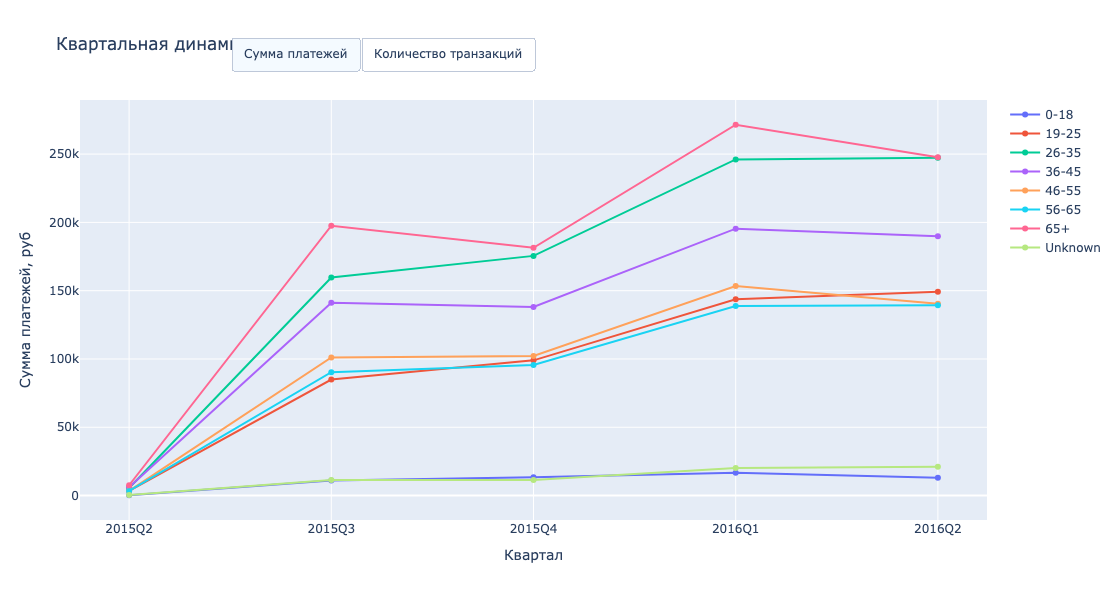

In [230]:
fig = go.Figure()

# для каждого возрастного сегмента
for i, age_group in enumerate(labels + ['Unknown']):
    fig.add_trace(
        go.Scatter(
            x=quarterly_payment.index.astype(str),
            y=quarterly_payment[age_group],
            name=age_group,
            visible=True,
            marker_color=px.colors.qualitative.Plotly[i],
            hovertemplate='Квартал: %{x}<br>Сумма: %{y:,.0f} руб'
        )
    )

# кнопки!!!
buttons = [
    dict(
        label="Сумма платежей",
        method="update",
        args=[{"y": [quarterly_payment[col].values for col in labels + ['Unknown']]},
              {"yaxis": {"title": {"text": "Сумма платежей, руб"}}}]
    ),
    dict(
        label="Количество транзакций",
        method="update",
        args=[{"y": [quarterly_transactions[col].values for col in labels + ['Unknown']]},
              {"yaxis": {"title": {"text": "Количество транзакций"}}}]
    )
]

fig.update_layout(
    title='Квартальная динамика по возрастным группам',
    xaxis_title='Квартал',
    yaxis_title='Сумма платежей, руб',
    updatemenus=[dict(
        type="buttons",
        direction="right",
        x=0.5,
        y=1.15,
        buttons=buttons
    )],
    height=600
)

fig.show()

### **Общие выводы в результате помесячного анализа**

1. Наибольшие сумма платажей и число транзакций приходится на сегмент 65+. Есть гипотеза, что данный сегмент можно раздробить ещё, и при наличии времени я бы провела аналитику по более детализированным сегментам :)
2. Наименьшие сумма платежей и число транзакций приходится на сегмент 0-18, а также на группу Unknown. Это связано с тем, что такие клиенты в меньшинстве, их доли минимальны.
3. Средний платёж в зависимости от возрастных групп не сильно разнится. Это может быть связано с тем, что, возможно, платёж имеет примерно фиксированную стоимость вне зависимости от возраста.
4. Наиболее популярные сегменты: 26-35 лет (25.3% от общего числа клиентов), 36-45 лет (21.4% от общего числа клиентов). Можно сказать, что взрослые люди отдают в наибольшей степени отдают предпочтение подпискам.
5. По квартальной динамике видно, что с течением времени как сумма платежей, так и количество транзакций растут. Возможно, сервис начинает обретать популярность и узнаваемость, появляется больше новых клиентов.